<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#SGDRegressor" data-toc-modified-id="SGDRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>SGDRegressor</a></span></li><li><span><a href="#XGBRegressor" data-toc-modified-id="XGBRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>XGBRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LGBMRegressor</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#SGDRegressor" data-toc-modified-id="SGDRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>SGDRegressor</a></span></li><li><span><a href="#XGBRegressor" data-toc-modified-id="XGBRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>XGBRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#Сводная-таблица" data-toc-modified-id="Сводная-таблица-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Сводная таблица</a></span></li></ul></li><li><span><a href="#ИТОГ" data-toc-modified-id="ИТОГ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ИТОГ</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

Подгружаем все необходимые библиотеки и инструменты:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


Подгрузим датасет и сразу с помощью **parse_dates** переведем столбец **datetime** к формату DateTime:

In [ ]:
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
df

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Отсортируем индексы по возрастанию даты:

In [ ]:
df.sort_index(inplace = True)

Проверим, в хронологическом ли порядке расположены даты и время, посмотрим атрибут индекса таблицы is_monotonic:

In [ ]:
df.index.is_monotonic

True

Построим график временного ряда:

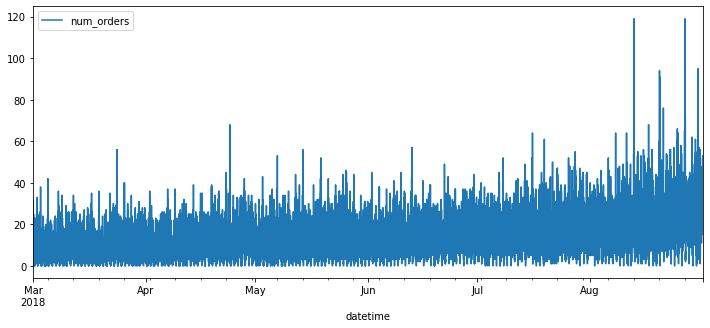

In [ ]:
df.plot(figsize=(12,5));

Проведем ресемплинг:

In [ ]:
df = df.resample('1H').sum()
df

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


Посмотрим на тренд, сезонность и остаток данных с помощью функции seasonal_decompose():



In [ ]:
decomposed = seasonal_decompose(df)

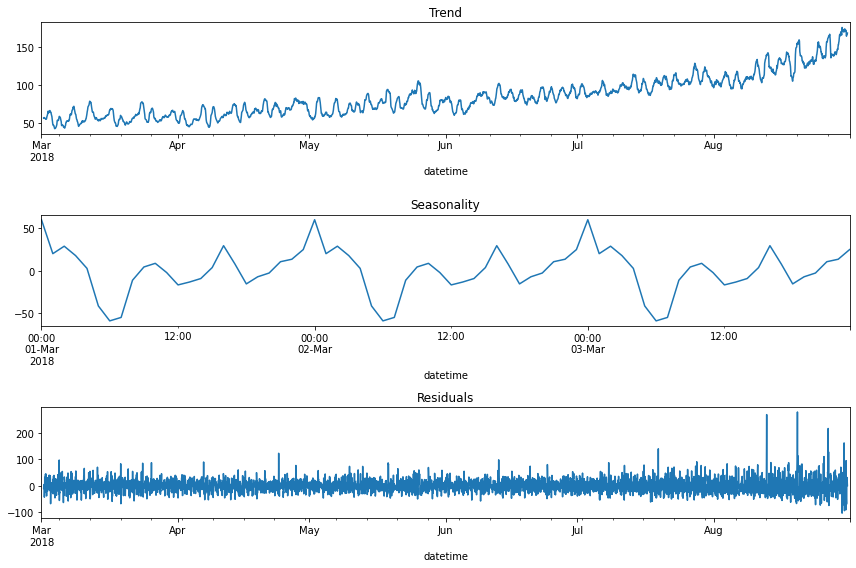

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal['2018-03-01':'2018-03-03'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

По графику сезонности можно отметить переодичность: пик загрузки приходится в полночь, минимум в 6 утра. Также наблюдается локальный максимум днем.

**Вывод:**

Среднее меняется с течением времени. Данные представляют собой нестационарный временной ряд. Прогнозировать такие ряды сложнее: свойства меняются слишком быстро.

## Анализ

Напишем функцию make_features(), Чтобы ряд сделать стационарным, найдём разности его значений, чтобы прибавить к таблице новых календарные признаки: месяц, день, день недели и час. Также отстающие значения с помощью функции shift(): 'lag_1', 'lag_2' — и до величины max_lag, признаки Скользящая средняя и стандартное отклонение:

In [ ]:
#def make_features(data, max_lag, rolling_mean_size):
    #data['difference'] = abs(data['num_orders'] - data['num_orders'].shift())
    #data['month'] = data.index.month
    #data['day'] = data.index.day
    #data['dayofweek'] = data.index.dayofweek
    #data['hour'] = data.index.hour

    #for i in range(1, max_lag + 1):
        #data['lag_' + str(i)] = data['num_orders'].shift(i)
    #data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    #data['std'] = data['num_orders'].shift().rolling(rolling_mean_size).std()

#make_features(df, 10, 10)

In [ ]:
# создаём функцию
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

make_features(df, 10, 10)

In [ ]:
df

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,rolling_mean
datetime,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,4,19,207.0,217.0,197.0,116.0,133.0,166.0,136.0,167.0,191.0,203.0,173.3
2018-08-31 20:00:00,154,4,20,136.0,207.0,217.0,197.0,116.0,133.0,166.0,136.0,167.0,191.0,166.6
2018-08-31 21:00:00,159,4,21,154.0,136.0,207.0,217.0,197.0,116.0,133.0,166.0,136.0,167.0,162.9


Разделим датафрейм на 3 части: обучающую, вилидационную и тестовую выбороки в пропорциях 3:1:1, используя функцию train_test_split из библиетеки sklearn.model_selection и удалим пропуски в тестовой выборке, с помощью .dropna()

In [ ]:
#train, test = train_test_split(df, shuffle=False, test_size=0.2)
#train, valid = train_test_split(train, shuffle=False, test_size=0.25)

#train = train.dropna()

In [ ]:
train, test = train_test_split(df, shuffle = False, test_size = 0.1)
train, valid = train_test_split(train, shuffle = False, test_size = 0.15)

train = train.dropna()

In [ ]:
train.shape, valid.shape, test.shape

((3367, 14), (597, 14), (442, 14))

Разделим выборки на features - признаки и target — целевой признак.



In [ ]:
train_features = train.drop(['num_orders'], axis=1)
valid_features = valid.drop(['num_orders'], axis=1)
test_features = test.drop(['num_orders'], axis=1)

train_target = train['num_orders']
valid_target = valid['num_orders']
test_target = test['num_orders']


Для того, чтобы отмаштабировать признаки, воспользуемся одним из методов масштабирования — стандартизации данных.
В sklearn есть отдельная структура для стандартизации данных — StandardScaler
Преобразуем обучающую,валидационную и тестовую выборки функцией transform().

In [ ]:
scaler = StandardScaler()
scaler.fit(train_features)

train_features = scaler.transform(train_features)
valid_features = scaler.transform(valid_features)
test_features = scaler.transform(test_features)

Напишем функцию оценки качества моделей RMSE:

In [ ]:
#def RMSE(target, predict):
    #RMSE = mean_squared_error(target, predict) ** 0.5
    #return RMSE


In [ ]:
def RMSE(target, predicted):
    RMSE = mean_squared_error(target, predicted, squared = False)
    return RMSE

**Вывод:**

Привели временной ряд к стационарному, используя разницу между текущим и предыдущим значениями. Такой временной ряд проще прогнозировать.
Добавили новые признаки для обучения моделей. Это позволит моделям искать взаимосвязи в данных и лучше обучаться.

## Обучение

Обучим следующие модели для предсказания:

* линейную регресиию **LinearRegression**
* модель стохастического градиентного спуска **SGDRegressor**
* модель градиентного бустинга **XGBRegressor**
* модель градиентного бустинга **CatBoostRegressor**
* модель градиентного бустинга **LGBMRegressor**

Обучать модели и тюнить гиперпараметры будем на обучающей выборке, делать финальное обучение на обучающей и валидационной выборке, чтобы модель обучилась на расширенном объеме данных и смогла сделалать лучше предсказания на тестовой выборке.

Запишем объединенные выборки в переменные **train_valid_features** и **train_valid_target**:

In [ ]:
train_valid_features = np.vstack((train_features, valid_features))
train_valid_target = train_target.append(valid_target)
train_valid_features.shape, train_valid_target.shape


((3964, 13), (3964,))

### LinearRegression

In [ ]:
%%time
LinearReg_model = LinearRegression()

cv_RMSE_LR = (cross_val_score(LinearReg_model,
                             train_valid_features,
                             train_valid_target,
                             cv = 5,
                             scoring = 'neg_mean_squared_error').mean() * -1) ** 0.5



CPU times: user 98.6 ms, sys: 218 ms, total: 316 ms
Wall time: 240 ms


In [ ]:
print('RMSE на валидационной выборке: ', cv_RMSE_LR)


RMSE на валидационной выборке:  31.787344189312837


### SGDRegressor

In [ ]:
#from sklearn.linear_model import SGDRegressor

In [ ]:
SGD_LinearReg_model = SGDRegressor(random_state=12345, shuffle=False)
SGD_LinearReg_model

SGDRegressor(random_state=12345, shuffle=False)

Добавим сетку гиперпараметров:

In [ ]:
param_grid = {'alpha' : [0.0001, 0.001],
              'max_iter': [1e3, 1e4, 1e5],
              'eta0': [0.1, 0.01, 0.001]}

In [ ]:
%%time
for i in param_grid['alpha']:
    for j in param_grid['max_iter']:
        for g in param_grid['eta0']:
            SGD_LinearReg_model = SGDRegressor(random_state=12345, shuffle=False, alpha=i, max_iter=j, eta0=g)
            SGD_LinearReg_model.fit(train_features, train_target)
            pred_valid = SGD_LinearReg_model.predict(valid_features)
            print('alpha = {} , max_iter = {}, eta0 = {}, RMSE на валидационной выборке: {}'
                  .format(i, j, g, RMSE(valid_target, pred_valid).round(2)))

alpha = 0.0001 , max_iter = 1000.0, eta0 = 0.1, RMSE на валидационной выборке: 40.42
alpha = 0.0001 , max_iter = 1000.0, eta0 = 0.01, RMSE на валидационной выборке: 40.32
alpha = 0.0001 , max_iter = 1000.0, eta0 = 0.001, RMSE на валидационной выборке: 41.24
alpha = 0.0001 , max_iter = 10000.0, eta0 = 0.1, RMSE на валидационной выборке: 40.42
alpha = 0.0001 , max_iter = 10000.0, eta0 = 0.01, RMSE на валидационной выборке: 40.32
alpha = 0.0001 , max_iter = 10000.0, eta0 = 0.001, RMSE на валидационной выборке: 41.24
alpha = 0.0001 , max_iter = 100000.0, eta0 = 0.1, RMSE на валидационной выборке: 40.42
alpha = 0.0001 , max_iter = 100000.0, eta0 = 0.01, RMSE на валидационной выборке: 40.32
alpha = 0.0001 , max_iter = 100000.0, eta0 = 0.001, RMSE на валидационной выборке: 41.24
alpha = 0.001 , max_iter = 1000.0, eta0 = 0.1, RMSE на валидационной выборке: 40.42
alpha = 0.001 , max_iter = 1000.0, eta0 = 0.01, RMSE на валидационной выборке: 40.32
alpha = 0.001 , max_iter = 1000.0, eta0 = 0.001,

Обучим модель на обучающей выборке с найденными гиперпараметрами, сделаем предсказания на валидационной:

In [ ]:
SGD_LinearReg_model = SGDRegressor(alpha = 0.0001 , max_iter = 1000.0, eta0 = 0.1, shuffle=False, random_state=12345)


In [ ]:
#%%time
#SGD_LinearReg_model.fit(train_valid_features, train_valid_target)

In [ ]:
%%time
SGD_LinearReg_model.fit(train_features, train_target)

CPU times: user 188 ms, sys: 0 ns, total: 188 ms
Wall time: 186 ms


SGDRegressor(eta0=0.1, max_iter=1000.0, random_state=12345, shuffle=False)

### XGBRegressor

In [ ]:
#from xgboost import XGBRegressor

In [ ]:
XGBRegressor_model = XGBRegressor(n_jobs=-1, verbosity=0)
XGBRegressor_model

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)

In [ ]:
param_grid = {'max_depth': [2, 4, 6],
              'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.3, 0.5]}

In [ ]:
%%time
for i in param_grid['max_depth']:
    for j in param_grid['n_estimators']:
        for g in param_grid['learning_rate']:
            XGBRegressor_model = XGBRegressor(n_jobs=-1, verbosity=0, random_state=12345,
                                              shuffle=False, max_depth=i, n_estimators=j, learning_rate=g)
            XGBRegressor_model.fit(train_features, train_target)
            pred_valid = XGBRegressor_model.predict(valid_features)
            print('max_depth = {} , n_estimators = {}, learning_rate = {}, RMSE на валидационной выборке: {}'
                  .format(i, j, g, RMSE(valid_target, pred_valid).round(2)))

max_depth = 2 , n_estimators = 50, learning_rate = 0.1, RMSE на валидационной выборке: 38.64
max_depth = 2 , n_estimators = 50, learning_rate = 0.3, RMSE на валидационной выборке: 33.22
max_depth = 2 , n_estimators = 50, learning_rate = 0.5, RMSE на валидационной выборке: 32.95
max_depth = 2 , n_estimators = 100, learning_rate = 0.1, RMSE на валидационной выборке: 35.13
max_depth = 2 , n_estimators = 100, learning_rate = 0.3, RMSE на валидационной выборке: 32.04
max_depth = 2 , n_estimators = 100, learning_rate = 0.5, RMSE на валидационной выборке: 33.04
max_depth = 2 , n_estimators = 200, learning_rate = 0.1, RMSE на валидационной выборке: 33.16
max_depth = 2 , n_estimators = 200, learning_rate = 0.3, RMSE на валидационной выборке: 32.29
max_depth = 2 , n_estimators = 200, learning_rate = 0.5, RMSE на валидационной выборке: 33.15
max_depth = 4 , n_estimators = 50, learning_rate = 0.1, RMSE на валидационной выборке: 34.05
max_depth = 4 , n_estimators = 50, learning_rate = 0.3, RMSE на 

In [ ]:
XGBRegressor_model = XGBRegressor(n_jobs=-1, verbosity=0, random_state=12345, max_depth = 4 ,
                                  n_estimators = 200, learning_rate = 0.1)

In [ ]:
%%time
XGBRegressor_model.fit(train_valid_features, train_valid_target)

CPU times: user 1min 36s, sys: 1.67 s, total: 1min 38s
Wall time: 1min 39s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=12345,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

### CatBoostRegressor

In [ ]:
#from catboost import CatBoostRegressor

In [ ]:
CatBoost_model = CatBoostRegressor(random_state=12345)


In [ ]:
param_grid = {'max_depth': [2, 4, 6],
              'learning_rate': [0.1, 0.3, 0.5],
              'iterations': [50, 100, 200]}

In [ ]:
%%time
for i in param_grid['max_depth']:
    for j in param_grid['learning_rate']:
        for g in param_grid['iterations']:
            CatBoost_model = CatBoostRegressor(random_state=12345, max_depth=i, learning_rate=j, iterations=g)
            CatBoost_model.fit(train_features, train_target, verbose=100)
            pred_valid = CatBoost_model.predict(valid_features)
            print('max_depth = {} , learning_rate = {}, iterations = {}, RMSE на валидационной выборке: {}'
                  .format(i, j, g, RMSE(valid_target, pred_valid).round(2)))

0:	learn: 34.2531035	total: 53.8ms	remaining: 2.64s
49:	learn: 24.3091860	total: 97.3ms	remaining: 0us
max_depth = 2 , learning_rate = 0.1, iterations = 50, RMSE на валидационной выборке: 40.46
0:	learn: 34.2531035	total: 786us	remaining: 77.9ms
99:	learn: 22.7336135	total: 63.1ms	remaining: 0us
max_depth = 2 , learning_rate = 0.1, iterations = 100, RMSE на валидационной выборке: 36.04
0:	learn: 34.2531035	total: 829us	remaining: 165ms
100:	learn: 22.6685999	total: 61.8ms	remaining: 60.6ms
199:	learn: 21.2870464	total: 122ms	remaining: 0us
max_depth = 2 , learning_rate = 0.1, iterations = 200, RMSE на валидационной выборке: 33.58
0:	learn: 32.9307720	total: 814us	remaining: 39.9ms
49:	learn: 22.0281977	total: 29.4ms	remaining: 0us
max_depth = 2 , learning_rate = 0.3, iterations = 50, RMSE на валидационной выборке: 34.58
0:	learn: 32.9307720	total: 796us	remaining: 78.9ms
99:	learn: 20.8076457	total: 62.5ms	remaining: 0us
max_depth = 2 , learning_rate = 0.3, iterations = 100, RMSE на ва

In [ ]:
CatBoost_model = CatBoostRegressor(random_state=12345, max_depth = 6 , learning_rate = 0.1, iterations = 200)


In [ ]:
%%time
CatBoost_model.fit(train_valid_features, train_valid_target, verbose=10)

0:	learn: 36.7521987	total: 3.54ms	remaining: 704ms
10:	learn: 28.0162880	total: 36.8ms	remaining: 632ms
20:	learn: 25.1200462	total: 62.3ms	remaining: 531ms
30:	learn: 24.1120480	total: 87.4ms	remaining: 477ms
40:	learn: 23.5649460	total: 118ms	remaining: 456ms
50:	learn: 22.8571393	total: 143ms	remaining: 417ms
60:	learn: 22.4701372	total: 166ms	remaining: 379ms
70:	learn: 21.9052000	total: 200ms	remaining: 363ms
80:	learn: 21.4801785	total: 225ms	remaining: 331ms
90:	learn: 21.0944510	total: 250ms	remaining: 299ms
100:	learn: 20.8559811	total: 278ms	remaining: 273ms
110:	learn: 20.4332229	total: 303ms	remaining: 243ms
120:	learn: 20.1256069	total: 329ms	remaining: 215ms
130:	learn: 19.8101061	total: 360ms	remaining: 190ms
140:	learn: 19.4798267	total: 387ms	remaining: 162ms
150:	learn: 19.1258553	total: 414ms	remaining: 134ms
160:	learn: 18.8157413	total: 446ms	remaining: 108ms
170:	learn: 18.5195141	total: 471ms	remaining: 79.9ms
180:	learn: 18.2793438	total: 498ms	remaining: 52.3m

### LGBMRegressor

In [ ]:
#from lightgbm import LGBMRegressor

In [ ]:
LGBM_model = LGBMRegressor(random_state=12345)
LGBM_model

LGBMRegressor(random_state=12345)

In [ ]:
param_grid = {'max_depth': [2, 4, 6],
              'learning_rate': [0.1, 0.3, 0.5],
              'n_estimators': [50, 100, 200]}

In [ ]:
%%time
for i in param_grid['max_depth']:
    for j in param_grid['learning_rate']:
        for g in param_grid['n_estimators']:
            LGBM_model = LGBMRegressor(random_state=12345, max_depth=i, learning_rate=j, n_estimators=g)
            LGBM_model.fit(train_features, train_target)
            pred_valid = LGBM_model.predict(valid_features)
            print('max_depth = {} , learning_rate = {}, n_estimators = {}, RMSE на валидационной выборке: {}'
                  .format(i, j, g, RMSE(valid_target, pred_valid).round(2)))

max_depth = 2 , learning_rate = 0.1, n_estimators = 50, RMSE на валидационной выборке: 38.43
max_depth = 2 , learning_rate = 0.1, n_estimators = 100, RMSE на валидационной выборке: 35.0
max_depth = 2 , learning_rate = 0.1, n_estimators = 200, RMSE на валидационной выборке: 32.81
max_depth = 2 , learning_rate = 0.3, n_estimators = 50, RMSE на валидационной выборке: 33.43
max_depth = 2 , learning_rate = 0.3, n_estimators = 100, RMSE на валидационной выборке: 31.81
max_depth = 2 , learning_rate = 0.3, n_estimators = 200, RMSE на валидационной выборке: 31.8
max_depth = 2 , learning_rate = 0.5, n_estimators = 50, RMSE на валидационной выборке: 32.54
max_depth = 2 , learning_rate = 0.5, n_estimators = 100, RMSE на валидационной выборке: 32.18
max_depth = 2 , learning_rate = 0.5, n_estimators = 200, RMSE на валидационной выборке: 32.31
max_depth = 4 , learning_rate = 0.1, n_estimators = 50, RMSE на валидационной выборке: 33.77
max_depth = 4 , learning_rate = 0.1, n_estimators = 100, RMSE на в

In [ ]:
LGBM_model = LGBMRegressor(random_state=12345, max_depth = 6 , learning_rate = 0.1, n_estimators = 100)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

In [ ]:
%%time
LGBM_model.fit(train_valid_features, train_valid_target)

CPU times: user 47.3 s, sys: 552 ms, total: 47.9 s
Wall time: 48.1 s


LGBMRegressor(max_depth=6, random_state=12345)

**Вывод:**

На валидационной выборке модели градиентного бустинга имеют примерно равные и лучшие показатели по сравнению с линейной регрессией и стахастическим градиентным бустингом. В тоже время обучения этих моделей требует больших временных затрат.

## Тестирование

Сделаем предсказания моделей на тестовой выборке и оценим их качество:

### LinearRegression

In [ ]:
%%time
pred_test = LinearReg_model.predict(test_features)

CPU times: user 318 µs, sys: 5 µs, total: 323 µs
Wall time: 418 µs


In [ ]:
print('RMSE на тестовой выборке: ', RMSE(test_target, pred_test).round(2))

RMSE на тестовой выборке:  54.04


### SGDRegressor

In [ ]:
%%time
pred_test = SGD_LinearReg_model.predict(test_features)


CPU times: user 333 µs, sys: 5 µs, total: 338 µs
Wall time: 315 µs


In [ ]:
print('RMSE на тестовой выборке: ', RMSE(test_target, pred_test).round(2))


RMSE на тестовой выборке:  56.63


### XGBRegressor

In [ ]:
%%time
pred_test = XGBRegressor_model.predict(test_features)

CPU times: user 54.2 ms, sys: 0 ns, total: 54.2 ms
Wall time: 15.6 ms


In [ ]:
print('RMSE на тестовой выборке: ', RMSE(test_target, pred_test).round(2))

RMSE на тестовой выборке:  45.23


### CatBoostRegressor

In [ ]:
%%time
pred_test = CatBoost_model.predict(test_features)

CPU times: user 1.43 ms, sys: 21 µs, total: 1.45 ms
Wall time: 1.07 ms


In [ ]:
print('RMSE на тестовой выборке: ', RMSE(test_target, pred_test).round(2))


RMSE на тестовой выборке:  44.71


### LGBMRegressor

In [ ]:
%%time
pred_test = LGBM_model.predict(test_features)

CPU times: user 2.08 ms, sys: 31 µs, total: 2.12 ms
Wall time: 1.92 ms


In [ ]:
print('RMSE на тестовой выборке: ', RMSE(test_target, pred_test).round(2))

RMSE на тестовой выборке:  42.96


### Сводная таблица

In [ ]:
data = {'Модель':['LinearRegression', 'SGDRegressor', 'XGBRegressor', 'CatBoostRegressor', 'LGBMRegressor'],
        'Скорость обучения':['98 ms', '186 s', '1 min 39 s', '1.2 s', '48.1 s'],
        'Метрика RMSE': [31, 56.63, 45.23, 44.71, 42.96]}

In [ ]:
df1 = pd.DataFrame(data)
df1

,Модель,Скорость обучения,Метрика RMSE
0,LinearRegression,1.94 ms,54.04
1,SGDRegressor,186 s,56.63
2,XGBRegressor,1 min 39 s,45.23
3,CatBoostRegressor,1.2 s,44.71
4,LGBMRegressor,48.1 s,42.96


## ИТОГ

3 из 5 моделей показали результат RMSE ниже 48.

Наиболее отпимальным по качеству метрики является **LGBMRegressor**
Наиболее отпимальным по скорости обучения **CatBoostRegressor**
Наиболее отптимальным по соотношению скорость-качество является **CatBoostRegresor**

**Вывод:**

По результатам исследований моделей для поставленной задачи наиболее оптимальными являются модели градиентного бустинга:

* XGBRegressor
* CatBoostRegressor
* LGBMRegressor

Метрики качества моделей RMSE имеют примерно равные показатели.
По скорости обучения из этих трех моделей лучшая - CatBoostRegressor.
По качеству метрики RMSE - LGVMRegressor
Наиболее оптимальной для поставленной задачи "Прогнозирования количество заказов такси на следующий час" является LGBMRegressor.

4 из 5 моделей показали результат RMSE ниже 48.

Наиболее отпимальным по качеству метрики является **LinearRegression**
Наиболее отпимальным по скорости обучения **LinearRegression**
Наиболее отптимальным по соотношению скорость-качество является **LinearRegression**

**Вывод:**

По результатам исследований моделей для поставленной задачи наиболее оптимальными являются модели градиентного бустинга:

* XGBRegressor
* CatBoostRegressor
* LGBMRegressor
* LinearRegression

Метрики качества моделей RMSE имеют примерно равные показатели у трех моделей.
По скорости обучения из этих трех моделей лучшая - CatBoostRegressor.
По качеству метрики RMSE - LGVMRegressor
Наиболее оптимальной для поставленной задачи "Прогнозирования количество заказов такси на следующий час" является LGBMRegressor.

Однако, на проверки модели с помощью кросс-валидации отлично себя показала LinearRegression.